In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv("customer_churn_updated.csv")
df.sample(5)

,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
2860,0,1,0,1,0,0,0,0,0,1,...,1,1,1,0,1,1,0,0.905473,0.815105,0
411,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.061692,0.120857,0
2540,1,0,1,0,0,0,0,0,0,1,...,1,0,1,1,1,0,1,0.522388,0.489805,0
3370,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0.011443,0.000069,0
2245,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.018408,0.032731,0


In [8]:
df.shape

(7032, 24)

In [9]:
df.Churn.value_counts() 


Churn
0    5163
1    1869
Name: count, dtype: int64

# The Data is imbalanced 
* majority class is 0 
* minority class is 1

# splitting the train test

In [10]:
X = df.drop('Churn' , axis = 1)
y = df['Churn']

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size=0.3 ,random_state=25 )
x_train.shape , x_test.shape 

((4922, 23), (2110, 23))

# Build Model on Imbalanced Dataset

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn

def ANN_Model(x_train , y_train , x_test , y_test , epoches):

    model = keras.Sequential([
        
        keras.layers.Dense(  23, input_shape = ( 23 , )  , activation = 'relu'   ),
        keras.layers.Dense(  15  , activation = 'relu'  ),
        keras.layers.Dense(  1   , activation = 'sigmoid')   
    ] )
    opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile( 
                optimizer=opt,
                loss ='binary_crossentropy',
                metrics = ['accuracy']
                )

    model.fit(x_train , y_train , epochs=epoches)
    
    print('evaluation result : ' , model.evaluate(x_test , y_test))
    
    
    y_pred = model.predict(x_test)
    y_pred = np.round( y_pred)
            
    return y_pred

y_pred = ANN_Model(x_train  , y_train , x_test , y_test , epoches = 10 )



Epoch 1/10
154/154 [==============================] - 3s 4ms/step - loss: 0.4517 - accuracy: 0.7830
Epoch 2/10
154/154 [==============================] - 1s 4ms/step - loss: 0.4257 - accuracy: 0.7991
Epoch 3/10
154/154 [==============================] - 1s 4ms/step - loss: 0.4204 - accuracy: 0.8019
Epoch 4/10
154/154 [==============================] - 1s 4ms/step - loss: 0.4167 - accuracy: 0.8068
Epoch 5/10
154/154 [==============================] - 1s 5ms/step - loss: 0.4154 - accuracy: 0.8019
Epoch 6/10
154/154 [==============================] - 1s 4ms/step - loss: 0.4129 - accuracy: 0.8066
Epoch 7/10
154/154 [==============================] - 1s 4ms/step - loss: 0.4070 - accuracy: 0.8133
Epoch 8/10
154/154 [==============================] - 1s 4ms/step - loss: 0.4097 - accuracy: 0.8082
Epoch 9/10
154/154 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8163
Epoch 10/10
66/66 [==============================] - 1s 4ms/step - loss: 0.4386 - accuracy: 0.7891
e

In [13]:
def model_evaluation(y_test , y_pred):
    print('------------------------')
    print('\nclassification Report')
    print(classification_report(y_test,y_pred))


    print('------------------------')
    cm = confusion_matrix(y_pred,y_test)
    plt.figure(figsize = (5,3))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

------------------------

classification Report
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1553
           1       0.64      0.46      0.54       557

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110

------------------------


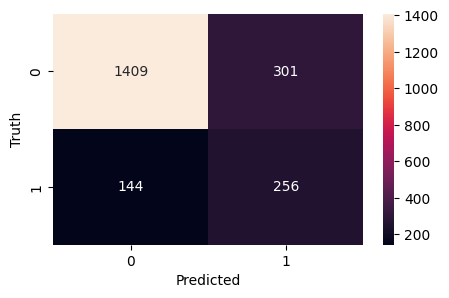

In [14]:
model_evaluation(y_test , y_pred)


<h2 style='color:red'> F1-Score is very low for the minority class (1)</h2>

# Build Model on balanced Dataset

<h1 style='color:blue'> 1.Undersampling The Majority class </h1>

In [15]:
class_0_count , class_1_count = df.Churn.value_counts()
class_0_count , class_1_count

(5163, 1869)

In [16]:
class_0_df = df[ df.Churn == 0] 
class_1_df = df[ df.Churn == 1]
class_0_df.shape , class_1_df.shape

((5163, 24), (1869, 24))

In [17]:
class_0_df.sample(2)

,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
1526,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0.074627,0.099671,0
2354,1,0,0,0,0,0,0,1,0,1,...,1,1,1,0,1,0,1,0.542289,0.280250,0


In [18]:
df_class_0_under = class_0_df.sample(class_1_count)
df_class_0_under.shape ,class_1_df.shape

((1869, 24), (1869, 24))

In [19]:
undersampled_df = pd.concat([df_class_0_under ,class_1_df ] , axis = 0)

print('Random Under-Sampling Data : ')
undersampled_df.Churn.value_counts()

Random Under-Sampling Data : 


Churn
0    1869
1    1869
Name: count, dtype: int64

In [20]:
X = undersampled_df.drop('Churn' , axis = 1)
y = undersampled_df['Churn']
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size=0.3 ,random_state=15 , stratify = y )
y_train.value_counts()


Churn
1    1308
0    1308
Name: count, dtype: int64

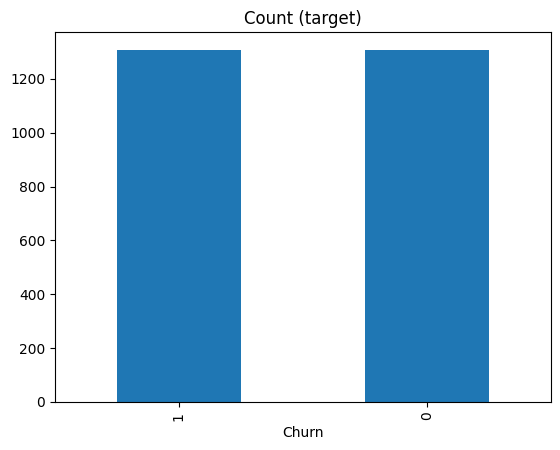

In [21]:
y_train.value_counts().plot(kind='bar', title='Count (target)');


In [22]:
y_pred = ANN_Model(x_train  , y_train , x_test , y_test , epoches = 10 )


Epoch 1/10
82/82 [==============================] - 2s 3ms/step - loss: 0.5177 - accuracy: 0.7477
Epoch 2/10
82/82 [==============================] - 0s 4ms/step - loss: 0.4898 - accuracy: 0.7672
Epoch 3/10
82/82 [==============================] - 0s 5ms/step - loss: 0.4846 - accuracy: 0.7645
Epoch 4/10
82/82 [==============================] - 0s 3ms/step - loss: 0.4692 - accuracy: 0.7733
Epoch 5/10
82/82 [==============================] - 0s 6ms/step - loss: 0.4792 - accuracy: 0.7714
Epoch 6/10
82/82 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.7791
Epoch 7/10
82/82 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.7775
Epoch 8/10
82/82 [==============================] - 0s 5ms/step - loss: 0.4614 - accuracy: 0.7775
Epoch 9/10
82/82 [==============================] - 0s 4ms/step - loss: 0.4539 - accuracy: 0.7871
Epoch 10/10
36/36 [==============================] - 1s 5ms/step - loss: 0.5297 - accuracy: 0.7273
evaluation result :

------------------------

classification Report
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       561
           1       0.72      0.75      0.73       561

    accuracy                           0.73      1122
   macro avg       0.73      0.73      0.73      1122
weighted avg       0.73      0.73      0.73      1122

------------------------


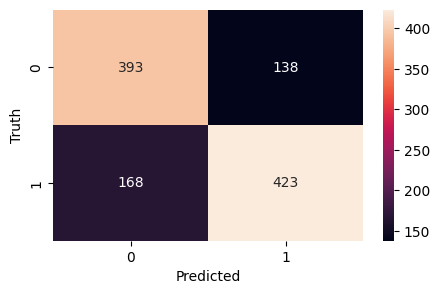

In [23]:
model_evaluation(y_test , y_pred)


<h2 style='color:red'> F1-Score is improved  for the minority class (1) : from 0.57 to 0.77</h2>

<h1 style='color:blue'> 2. Random Oversampling The Minority class </h1>

In [24]:
class_0_count , class_1_count

(5163, 1869)

In [25]:
df_class_1_over =  class_1_df.sample(class_0_count , replace=True)
df_class_1_over.shape , class_0_df.shape

((5163, 24), (5163, 24))

In [26]:
oversampled_df = pd.concat([df_class_1_over ,class_0_df ] , axis = 0)

print('Random Oversampling-Sampling Minority clss : ')
oversampled_df.Churn.value_counts()

Random Oversampling-Sampling Minority clss : 


Churn
1    5163
0    5163
Name: count, dtype: int64

In [27]:
X = oversampled_df.drop('Churn' , axis = 1)
y = oversampled_df['Churn']



In [28]:
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size=0.3 ,random_state=15 , stratify = y )
y_train.value_counts()

Churn
0    3614
1    3614
Name: count, dtype: int64

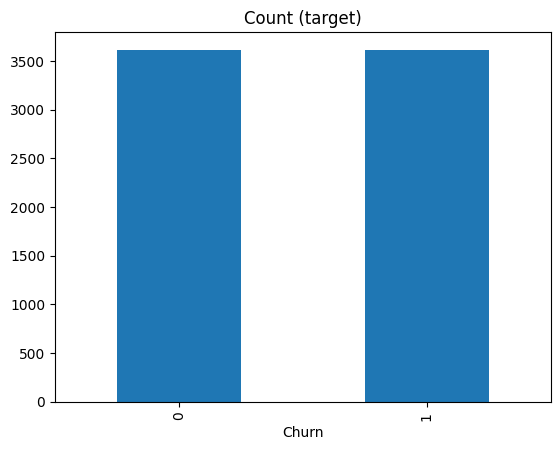

In [29]:
y_train.value_counts().plot(kind='bar', title='Count (target)');

In [30]:
x_train.shape , x_test.shape 

((7228, 23), (3098, 23))

In [31]:
y_pred = ANN_Model(x_train  , y_train , x_test , y_test , epoches = 10 )


Epoch 1/10
226/226 [==============================] - 2s 3ms/step - loss: 0.5159 - accuracy: 0.7403
Epoch 2/10
226/226 [==============================] - 1s 3ms/step - loss: 0.4919 - accuracy: 0.7576
Epoch 3/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4834 - accuracy: 0.7637
Epoch 4/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4759 - accuracy: 0.7721
Epoch 5/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4727 - accuracy: 0.7678
Epoch 6/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4686 - accuracy: 0.7810
Epoch 7/10
226/226 [==============================] - 1s 5ms/step - loss: 0.4644 - accuracy: 0.7745
Epoch 8/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4565 - accuracy: 0.7797
Epoch 9/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4565 - accuracy: 0.7810
Epoch 10/10
97/97 [==============================] - 1s 5ms/step - loss: 0.4728 - accuracy: 0.7660
e

------------------------

classification Report
              precision    recall  f1-score   support

           0       0.82      0.68      0.74      1549
           1       0.73      0.85      0.78      1549

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.76      3098
weighted avg       0.77      0.77      0.76      3098

------------------------


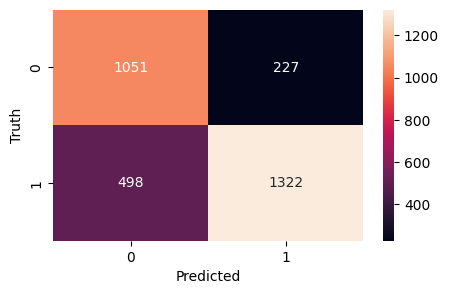

In [32]:
model_evaluation(y_test , y_pred)


<b>Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

</b>

<h1 style='color:blue'> 3. SMOTE - Synthetic Minority Oversampling TEchnique  </h1>
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

Churn
0    5163
1    1869
Name: count, dtype: int64


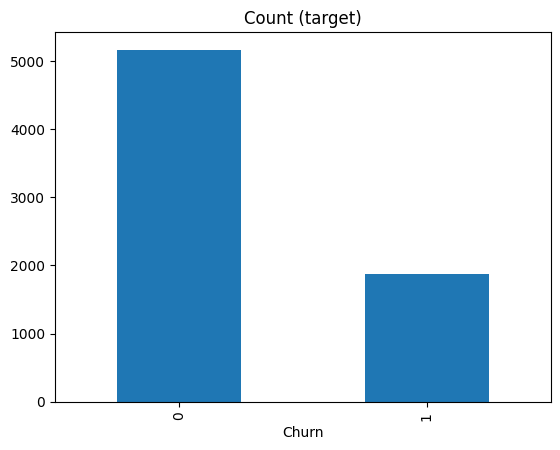

In [33]:
X = df.drop('Churn' , axis = 1)
y = df['Churn']

print(y.value_counts())
y.value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [34]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

X_sm.shape , y_sm.shape

((10326, 23), (10326,))

In [35]:
X.shape , y.shape

((7032, 23), (7032,))

Churn
0    5163
1    5163
Name: count, dtype: int64


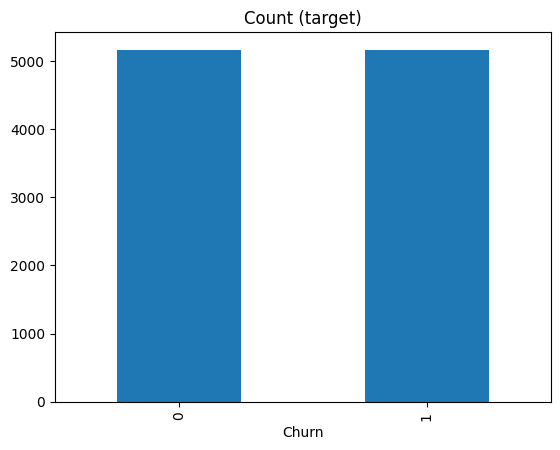

In [36]:
print(y_sm.value_counts())
y_sm.value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [37]:
x_train , x_test , y_train , y_test = train_test_split(X_sm , y_sm, test_size=0.3 ,random_state=15 , stratify = y_sm )
y_train.value_counts()

Churn
0    3614
1    3614
Name: count, dtype: int64

In [38]:
y_pred = ANN_Model(x_train  , y_train , x_test , y_test , epoches = 10 )


Epoch 1/10
226/226 [==============================] - 3s 4ms/step - loss: 0.4844 - accuracy: 0.7681
Epoch 2/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4579 - accuracy: 0.7825
Epoch 3/10
226/226 [==============================] - 1s 3ms/step - loss: 0.4505 - accuracy: 0.7829
Epoch 4/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4427 - accuracy: 0.7912
Epoch 5/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4374 - accuracy: 0.7940
Epoch 6/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4379 - accuracy: 0.7939
Epoch 7/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4307 - accuracy: 0.7988
Epoch 8/10
226/226 [==============================] - 1s 4ms/step - loss: 0.4256 - accuracy: 0.8046
Epoch 9/10
226/226 [==============================] - 1s 3ms/step - loss: 0.4214 - accuracy: 0.8042
Epoch 10/10
97/97 [==============================] - 1s 4ms/step - loss: 0.4528 - accuracy: 0.7876
e

------------------------

classification Report
              precision    recall  f1-score   support

           0       0.83      0.73      0.77      1549
           1       0.76      0.85      0.80      1549

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098

------------------------


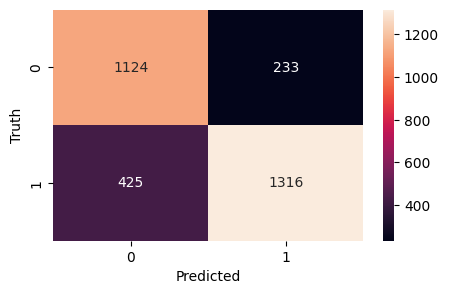

In [39]:
model_evaluation(y_test , y_pred)

<b>SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.80</b>

# 4. Ensembe with undersampling

In [40]:
# Regain Original features and labels
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [42]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [43]:
4130/1495

2.762541806020067

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [44]:
train_df = X_train.copy()
train_df['Churn'] = y_train

train_df_class0 = train_df[train_df.Churn==0]
train_df_class1 = train_df[train_df.Churn==1]

In [45]:
train_df_class0.shape , train_df_class1.shape

((4130, 24), (1495, 24))

In [46]:
def get_train_batch(df_majority, df_minority, start, end):
    
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    print(df_train.shape  )
    
    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    
    return X_train, y_train    

In [47]:
X_train1, y_train1 = get_train_batch(train_df_class0, train_df_class1, 0, 1495)


(2990, 24)


In [48]:
y_train1.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [49]:
y_pred1 = ANN_Model(X_train1, y_train1, X_test, y_test, epoches = 10)

Epoch 1/10


94/94 [==============================] - 3s 5ms/step - loss: 0.5350 - accuracy: 0.7344
Epoch 2/10
94/94 [==============================] - 0s 5ms/step - loss: 0.4960 - accuracy: 0.7582
Epoch 3/10
94/94 [==============================] - 0s 5ms/step - loss: 0.4873 - accuracy: 0.7666
Epoch 4/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.7662
Epoch 5/10
94/94 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7753
Epoch 6/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4806 - accuracy: 0.7699
Epoch 7/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4751 - accuracy: 0.7789
Epoch 8/10
94/94 [==============================] - 1s 6ms/step - loss: 0.4713 - accuracy: 0.7793
Epoch 9/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.7816
Epoch 10/10
44/44 [==============================] - 0s 4ms/step - loss: 0.5363 - accuracy: 0.7321
evaluation result :  [0.536267

2nd model

In [50]:
X_train2, y_train2 = get_train_batch(train_df_class0, train_df_class1, 1495, 2*1495)
X_train2.shape , y_train2.shape , y_train2.value_counts()

(2990, 24)


((2990, 23),
 (2990,),
 Churn
 0    1495
 1    1495
 Name: count, dtype: int64)

In [51]:
y_pred2 = ANN_Model(X_train2, y_train2, X_test, y_test, epoches = 10)

Epoch 1/10
94/94 [==============================] - 2s 4ms/step - loss: 0.5375 - accuracy: 0.7378
Epoch 2/10
94/94 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7625
Epoch 3/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.7555
Epoch 4/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 0.7666
Epoch 5/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4736 - accuracy: 0.7669
Epoch 6/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4663 - accuracy: 0.7742
Epoch 7/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4640 - accuracy: 0.7746
Epoch 8/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4626 - accuracy: 0.7816
Epoch 9/10
94/94 [==============================] - 0s 4ms/step - loss: 0.4558 - accuracy: 0.7786
Epoch 10/10
44/44 [==============================] - 0s 4ms/step - loss: 0.5065 - accuracy: 0.7463
evaluation result :

3rd model

In [52]:
X_train3, y_train3 = get_train_batch(train_df_class0, train_df_class1, 2*1495,4130)
X_train3.shape , y_train3.shape 

(2635, 24)


((2635, 23), (2635,))

In [53]:
y_train3.value_counts()

Churn
1    1495
0    1140
Name: count, dtype: int64

In [54]:
y_pred3 = ANN_Model(X_train3, y_train3, X_test, y_test, epoches = 10)

Epoch 1/10
83/83 [==============================] - 2s 4ms/step - loss: 0.5272 - accuracy: 0.7355
Epoch 2/10
83/83 [==============================] - 0s 4ms/step - loss: 0.4943 - accuracy: 0.7662
Epoch 3/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7750
Epoch 4/10
83/83 [==============================] - 0s 4ms/step - loss: 0.4738 - accuracy: 0.7696
Epoch 5/10
83/83 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.7814
Epoch 6/10
83/83 [==============================] - 0s 5ms/step - loss: 0.4641 - accuracy: 0.7871
Epoch 7/10
83/83 [==============================] - 0s 4ms/step - loss: 0.4630 - accuracy: 0.7818
Epoch 8/10
83/83 [==============================] - 0s 4ms/step - loss: 0.4627 - accuracy: 0.7886
Epoch 9/10
83/83 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.7841
Epoch 10/10
44/44 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.6972
evaluation result :

# Get final vote of y prediction from all 3 model 

In [55]:
# y_pred1 = y_pred1.T[0]
# y_pred2 = y_pred2.T[0]
# y_pred3 = y_pred3.T[0]

In [62]:
y_majority_vote_pred = []

total_count = len(y_pred1)

for p1,p2,p3 in zip(y_pred1,y_pred2,y_pred3):
    total_vote = np.sum(np.concatenate( (p1,p2,p3) ))
    y_majority_vote_pred.append(  1 if total_vote >= 1 else 0 )


------------------------

classification Report
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1033
           1       0.44      0.86      0.58       374

    accuracy                           0.68      1407
   macro avg       0.68      0.73      0.66      1407
weighted avg       0.79      0.68      0.69      1407

------------------------


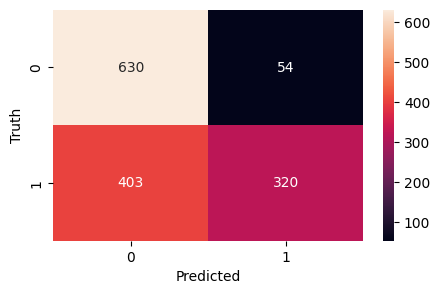

In [63]:
model_evaluation(y_test , y_majority_vote_pred)